# 2.2.4 Unsupervised learning: seeking representations of the data

## K-means

In [1]:
from sklearn import cluster, datasets

In [2]:
iris = datasets.load_iris()
X_iris = iris.data
y_iris = iris.target

In [3]:
k_means = cluster.KMeans(n_clusters = 3)
k_means.fit(X_iris)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [4]:
print(k_means.labels_[::10])
print(y_iris[::10])

[1 1 1 1 1 2 2 2 2 2 0 0 0 0 0]
[0 0 0 0 0 1 1 1 1 1 2 2 2 2 2]


### Application example: vector quantization

In [5]:
import scipy as sp
try:
    face = sp.face()
except AttributeError:
    from scipy import misc
    face = misc.face()

X = face.reshape((-1, 1)) # We need an (n_sample, n_feature) array
k_means = cluster.KMeans(n_clusters=5, n_init= 1)
k_means.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=1, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [37]:
ls

01-2-1-4-model_persistence.ipynb
01-2-1-5-conventions.ipynb
01-scikitlrn.ipynb
02-2-2-1-statistical-learning.ipynb
02-2-2-3-model-selection.ipynb
02-2-2-4-unsupervised-learning.ipynb
02-skl-load-data.ipynb
03-matplotlib-tut.ipynb
04-matplotlib-image-tut.ipynb
05-matplotlib-misc.ipynb
06-annotation-demo.ipynb
06-matplotlib-try-editing-dif-cell.ipynb
07-matplotlib-legend.ipynb
08-annotating-axes.ipynb
09-screenshots.ipynb
Untitled1.ipynb
alldone.png
annotate_text_arrow.py
annotation_demo2.py
barchart_demo.py
demo-1.py
fancybox_demo2.py
filename.pkl
finance_work2.ipynb
finance_work2.py
histogram_demo_features.py
image_tutorial-6.py
image_tutorial-7.py
legend_demo.py
legend_guide-1.py
path_patch_demo.py
plot_cv_diabetes.py
requirements.txt
simple_legend01.py
simple_legend02.py
simple_plot.py
stinkbug.png
subplot_demo.py
surface3d_demo.py
table_demo.py
test.png
uninstall-error.log


In [26]:
values = k_means.cluster_centers_.squeeze()
labels = k_means.labels_
face_compressed = np.choose(labels, values)
face_compressed.shape = face.shape

In [30]:
face_compressed[0]

array([[ 111.25509087,  111.25509087,  111.25509087],
       [ 153.86575893,  111.25509087,  153.86575893],
       [ 153.86575893,  153.86575893,  153.86575893],
       ..., 
       [ 111.25509087,  111.25509087,   70.40428497],
       [ 111.25509087,  153.86575893,   70.40428497],
       [ 153.86575893,  153.86575893,   70.40428497]])

In [38]:
from IPython.display import Image
Image('./test.png')

<IPython.core.display.Image object>

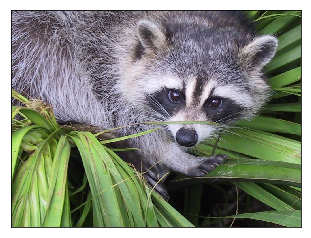

In [56]:
plt.figure()
vmax = max(face.max(), -face.min())
plt.imshow(face.reshape(768,1024, 3), cmap = plt.cm.gray,
     interpolation = 'nearest', vmin = -vmax, vmax = vmax)
plt.xticks(())
plt.yticks(())
plt.show()


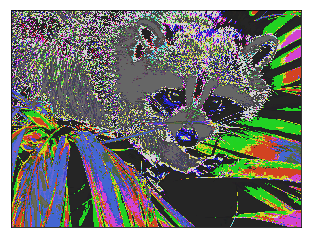

In [55]:
plt.figure()
vmax = max(face.max(), -face.min())
plt.imshow(face_compressed.reshape(768,1024, 3), cmap = plt.cm.gray,
     interpolation = 'nearest', vmin = -vmax, vmax = vmax)
plt.xticks(())
plt.yticks(())
plt.show()


In [60]:
sp.misc.face()

array([[[121, 112, 131],
        [138, 129, 148],
        [153, 144, 165],
        ..., 
        [119, 126,  74],
        [131, 136,  82],
        [139, 144,  90]],

       [[ 89,  82, 100],
        [110, 103, 121],
        [130, 122, 143],
        ..., 
        [118, 125,  71],
        [134, 141,  87],
        [146, 153,  99]],

       [[ 73,  66,  84],
        [ 94,  87, 105],
        [115, 108, 126],
        ..., 
        [117, 126,  71],
        [133, 142,  87],
        [144, 153,  98]],

       ..., 
       [[ 87, 106,  76],
        [ 94, 110,  81],
        [107, 124,  92],
        ..., 
        [120, 158,  97],
        [119, 157,  96],
        [119, 158,  95]],

       [[ 85, 101,  72],
        [ 95, 111,  82],
        [112, 127,  96],
        ..., 
        [121, 157,  96],
        [120, 156,  94],
        [120, 156,  94]],

       [[ 85, 101,  74],
        [ 97, 113,  84],
        [111, 126,  97],
        ..., 
        [120, 156,  95],
        [119, 155,  93],
        [118, 154,

## Hierarchical clustering

In [61]:
from sklearn.feature_extraction.image import grid_to_graph
from sklearn.cluster import AgglomerativeClustering

In [72]:
# Generate data
face = sp.misc.face()
# Downsample image by a factor of 4

face = face[::2, ::2] + face[1::2, ::2] + face[::2, 1::2] + face[1::2, 1::2]
X = np.reshape(face, (-1, 1))

In [73]:
# Define the structure A of the data
# Pixels connected to their neighbors

connectivity = grid_to_graph(*face.shape)

In [0]:
import time
# Compute clustering
print('Comput structured hierarchical clustering...')
st = time.time()
n_clusters = 15 # number of regions
ward = AgglomerativeClustering(
    n_clusters= n_clusters, 
        linkage = 'ward', 
        connectivity= connectivity).fit(X)
label = np.reshape(ward.labels_, face.shape)


In [81]:
print("Elapsed time: ", time.time() - st)
print("Number of pixels: ", label.size)
print("Number of clusters: ", np.unique(label).size)

Comput structured hierarchical clustering...


('Elapsed time: ', 108.48048901557922)
('Number of pixels: ', 589824)
('Number of clusters: ', 15)


('Elapsed time: ', 108.50585293769836)
('Number of pixels: ', 589824)
('Number of clusters: ', 15)


In [83]:
digits = datasets.load_digits()
images = digits.images

In [0]:
X = np.reshape(images, (len(images), -1))
connectivity = grid_to_graph(*images[0].shape)

agglo = cluster.FeatureAgglomeration(
    connectivity= connectivity, n_clusters= 32)

agglo.fit(X)